In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

2025-05-17 18:37:13.559610: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-17 18:37:14.075189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
TRAIN_PATH = "/home/iniloay/Piedras/Proyecto_ML_ClasificacionRocas/ProyectoPiedras/src/data/Rocks life.v2i.folder"
TEST_PATH = "/home/iniloay/Piedras/Proyecto_ML_ClasificacionRocas/ProyectoPiedras/src/data/Rocks life.v2i.folder"
VALID_PATH = "/home/iniloay/Piedras/Proyecto_ML_ClasificacionRocas/ProyectoPiedras/src/data/Rocks life.v2i.folder"

In [5]:
train_dir = os.path.join(TRAIN_PATH, 'train')
validation_dir = os.path.join(VALID_PATH, 'valid')
test_dir = os.path.join(TEST_PATH, 'test')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 5667 files belonging to 6 classes.


2025-05-17 18:38:14.385514: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-17 18:38:14.447990: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-17 18:38:14.448055: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-17 18:38:14.454580: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-17 18:38:14.454633: I external/local_xla/xla/stream_executor

In [ ]:
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = raw_train_dataset.class_names
print(class_names)

Found 5667 files belonging to 6 classes.
['Conglomerate', 'Dolomitic Limestone', 'Limestone', 'Sandstone', 'Shale_(Mudstone)', 'tezontle']


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 539 files belonging to 6 classes.


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 274 files belonging to 6 classes.


In [ ]:
raw_tr_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = raw_tr_dataset.class_names
print(class_names)

Found 274 files belonging to 6 classes.
['Conglomerate', 'Dolomitic Limestone', 'Limestone', 'Sandstone', 'Shale_(Mudstone)', 'tezontle']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label

train_dataset = train_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
base_model = ResNet50(input_shape=IMG_SIZE + (3,),
                      include_top=False,
                      weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 clases
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,758 (90.98 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

EPOCHS = 50

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS,
    callbacks=[early_stopping],
)

Epoch 1/50


I0000 00:00:1747496086.407801  208113 service.cc:145] XLA service 0x7f077c001fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747496086.408491  208113 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4090 Laptop GPU, Compute Capability 8.9
2025-05-17 17:34:46.751816: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-17 17:34:47.510415: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1747496089.202105  208413 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_8147', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1747496091.943192  208427 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5284', 184 bytes spill stores, 524 bytes spill loads


  3/178 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.1528 - loss: 2.6371  

I0000 00:00:1747496095.506959  208113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5334 - loss: 1.2801

I0000 00:00:1747496111.656793  208739 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1698', 244 bytes spill stores, 244 bytes spill loads



178/178 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - accuracy: 0.5340 - loss: 1.2783 - val_accuracy: 0.7180 - val_loss: 0.7604
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.7899 - loss: 0.5889 - val_accuracy: 0.7514 - val_loss: 0.6539
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.8539 - loss: 0.3956 - val_accuracy: 0.8015 - val_loss: 0.6470
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.9081 - loss: 0.2667 - val_accuracy: 0.8089 - val_loss: 0.6389
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9340 - loss: 0.1986 - val_accuracy: 0.8423 - val_loss: 0.5865
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9471 - loss: 0.1556 - val_accuracy: 0.8330 - val_loss: 0.5952
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9645 - loss: 0.1175 - val_accuracy: 0.8460 - val_loss: 0.6273
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9603 - loss: 0.1196 - val_accuracy: 0

In [ ]:
# --- FASE 2: Fine-tuning de las últimas capas de ResNet50 ---
base_model.trainable = True

# Descongelar solo las últimas 35 capas
fine_tune_at = 120
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompilar con tasa de aprendizaje baja
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento adicional
total_epochs = EPOCHS + 10

history_finetune = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1] + 1,
    callbacks=[early_stopping]
)

Epoch 26/60


178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.7651 - loss: 0.7740 - val_accuracy: 0.8256 - val_loss: 0.6941
Epoch 27/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.9433 - loss: 0.1596 - val_accuracy: 0.8386 - val_loss: 0.6633
Epoch 28/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9746 - loss: 0.0877 - val_accuracy: 0.8460 - val_loss: 0.6482
Epoch 29/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.9816 - loss: 0.0667 - val_accuracy: 0.8571 - val_loss: 0.6521
Epoch 30/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.9874 - loss: 0.0446 - val_accuracy: 0.8534 - val_loss: 0.6606
Epoch 31/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.9896 - loss: 0.0394 - val_accuracy: 0.8590 - val_loss: 0.6598
Epoch 32/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.9943 - loss: 0.0265 - val_accuracy: 0.8516 - val_loss: 0.6824
Epoch 33/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.9935 - loss: 0.0250 - val

<Axes: >

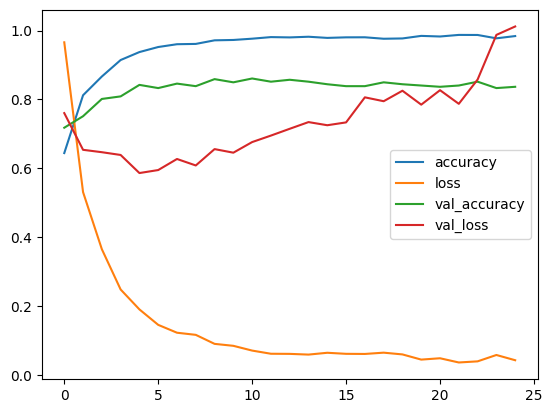

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Precisión en test: {test_accuracy * 100:.2f}%")

8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8683 - loss: 0.6266

I0000 00:00:1747496736.244074  217285 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1698', 244 bytes spill stores, 244 bytes spill loads



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - accuracy: 0.8706 - loss: 0.6266
Precisión en test: 87.96%


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025-05-17 17:45:43.075569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


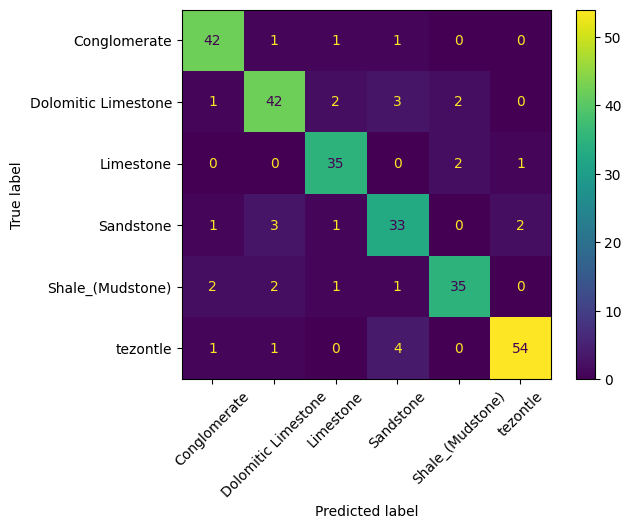

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=raw_tr_dataset.class_names)
disp.plot(xticks_rotation=45)

In [ ]:
cm

array([[42,  1,  1,  1,  0,  0],
       [ 1, 42,  2,  3,  2,  0],
       [ 0,  0, 35,  0,  2,  1],
       [ 1,  3,  1, 33,  0,  2],
       [ 2,  2,  1,  1, 35,  0],
       [ 1,  1,  0,  4,  0, 54]])